In [1]:
import torch
import numpy as np
from torch import nn
from torch import optim
from matplotlib import pyplot as plt

# Regresión Lineal
---

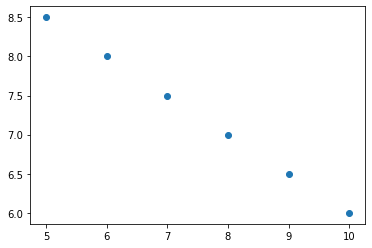

In [2]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]
plt.scatter(car_prices, units_sold)

In [5]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)
prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [10]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()
prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.019232260063290596


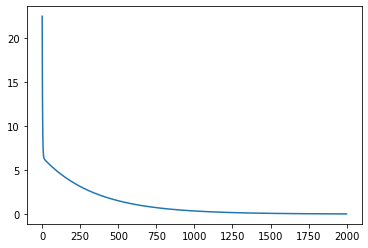

In [40]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()  # Media de los cuadrados de los errores
optimizer = optim.SGD(model.parameters(), lr=0.015)
losses = []
iterations = 2000
for i in range(iterations):
    predicion = model(prices)
    loss = loss_function(predicion, units)
    losses.append(loss.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(float(loss))
plt.plot(range(iterations), losses)

In [43]:
x = torch.Tensor([[14.0]])  # a mayor precio menores ventas | a menor precio mayores ventas
p = model(x)
p

tensor([[4.4841]], grad_fn=<AddmmBackward>)

# Regresión Logística
---

In [2]:
n = 100
h = n//2
dimen = 2
data = np.random.randn(n, dimen)*3
data

array([[ 7.53678265e+00,  2.29141331e+00],
       [-5.02964800e+00,  2.23195712e+00],
       [-2.55273505e+00,  2.71771022e+00],
       [ 6.16601654e+00,  2.15581616e+00],
       [-2.90529711e+00,  7.69150613e-01],
       [ 5.19002650e+00,  3.90940417e+00],
       [-5.52854060e-01, -1.92174377e-01],
       [-5.09538801e+00, -2.06909229e+00],
       [-1.38454812e+00,  1.20705827e-01],
       [-7.02231465e+00,  6.43290494e+00],
       [ 3.37869138e-01, -3.51796070e+00],
       [-5.32858781e-01, -2.68589046e+00],
       [ 2.77650324e+00,  2.39954502e+00],
       [-4.96164971e+00,  3.79365004e+00],
       [ 1.49093922e+00, -1.03871975e+00],
       [ 1.89410862e+00, -3.45419269e+00],
       [-2.19674057e+00, -3.00595120e+00],
       [-7.29319894e+00, -1.56865386e+00],
       [-1.86228007e+00,  4.50874384e+00],
       [-2.34768370e+00,  4.04480039e+00],
       [ 1.85592145e+00,  2.47992584e-01],
       [-2.82636910e+00,  5.04068274e+00],
       [-3.16289187e+00,  5.00136793e-01],
       [-7.

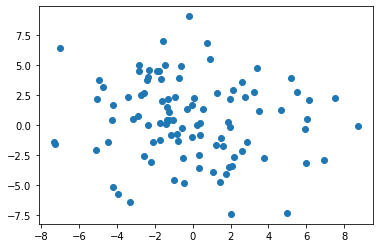

In [3]:
plt.scatter(data[:, 0], data[:, 1])

In [4]:
data[:h, :] = data[:h, :] - 3 * np.ones((h, dimen))

In [5]:
data[h:, :] = data[h:, :] + 3 * np.ones((h, dimen))

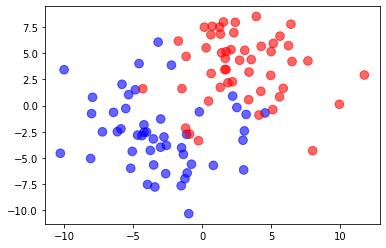

In [6]:
colors = ['blue', 'red']
color = np.array([colors[0]] * h + [colors[1]] * h).reshape(n)
plt.scatter(data[:, 0], data[:, 1], c=color, s=75, alpha=0.6)

In [7]:
target = np.array([0] * h + [1] * h).reshape(n, 1)
x = torch.from_numpy(data).float().requires_grad_(True)  #input
y = torch.from_numpy(target).float()  # output
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.2403, grad_fn=<BinaryCrossEntropyBackward>)

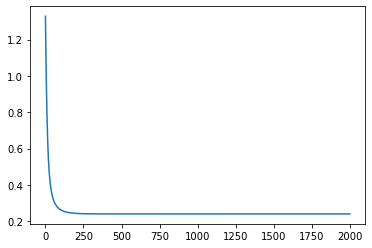

In [8]:
model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [12]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

blue


In [13]:
red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

red


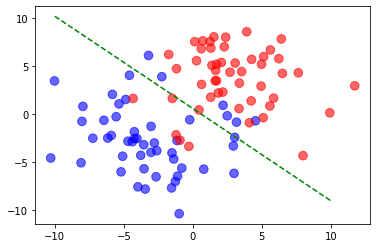

In [20]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)
x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis * w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')